In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [14]:
data = pd.read_csv("../Data/clean/CDC/CDCSTDoverall2000_2020_clean.csv")

In [15]:
df_sum = data.groupby(['year'])['cases_gonorrhea','cases_chlamydia','cases_early_non-primary_non-secondary_syphilis','cases_primary_and_secondary_syphilis'].sum().reset_index()

/var/folders/zl/tww5174129gdj_kds5bh2xx80000gn/T/ipykernel_2937/3700150800.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_sum = data.groupby(['year'])['cases_gonorrhea','cases_chlamydia','cases_early_non-primary_non-secondary_syphilis','cases_primary_and_secondary_syphilis'].sum().reset_index()


In [16]:
df_sum

,year,cases_gonorrhea,cases_chlamydia,cases_early_non-primary_non-secondary_syphilis,cases_primary_and_secondary_syphilis
0,2000,211146.0,382937.0,9989.0,6117.0
1,2001,245376.0,487710.0,9262.0,6287.0
2,2002,345771.0,813734.0,9064.0,7089.0
3,2003,332157.0,869687.0,8989.0,7352.0
4,2004,327207.0,921261.0,8101.0,8152.0
5,2005,336097.0,964913.0,8586.0,8935.0
6,2006,356037.0,1027346.0,9534.0,9895.0
7,2007,353727.0,1107441.0,11154.0,11620.0
8,2008,331487.0,1199261.0,12601.0,13639.0
9,2009,299468.0,1243433.0,13220.0,14216.0


### Cases with change in time nationally

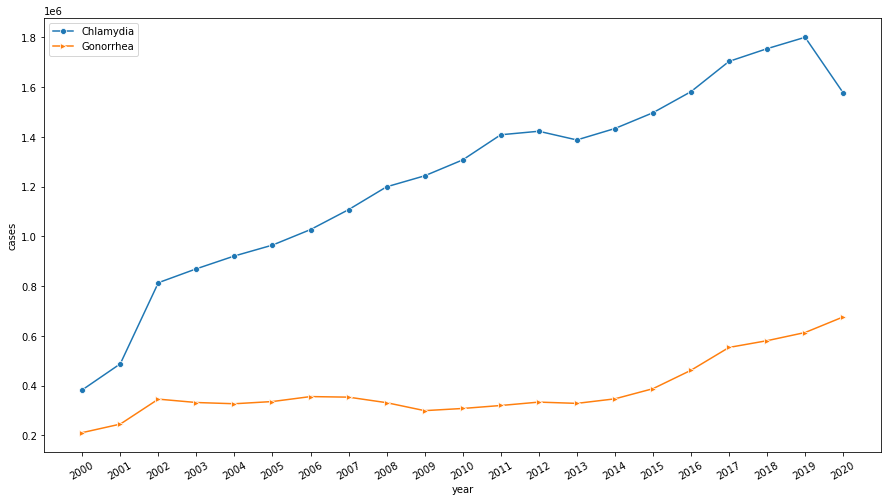

In [111]:
plt.figure(figsize = (15,8))
g = sns.lineplot(data = df_sum, x = 'year', y = 'cases_chlamydia',marker = "o")
sns.lineplot(data = df_sum, x = 'year', y = 'cases_gonorrhea',marker = ">")
# sns.lineplot(data = df_sum, x = 'year', y = 'cases_Early Non-Primary, Non-Secondary Syphilis',marker = "<")
# sns.lineplot(data = df_sum, x = 'year', y = 'cases_Primary and Secondary Syphilis', marker = "|")
g.set_ylabel('cases')
g.set_xticks(df_sum['year'])
g.set_xticklabels(ax.get_xticklabels(),rotation = 30)
plt.legend(labels=["Chlamydia","Gonorrhea"])
plt.savefig('../Output/EDA/cases_chlamydia_gonorrhea.png',dpi=300)
plt.show()

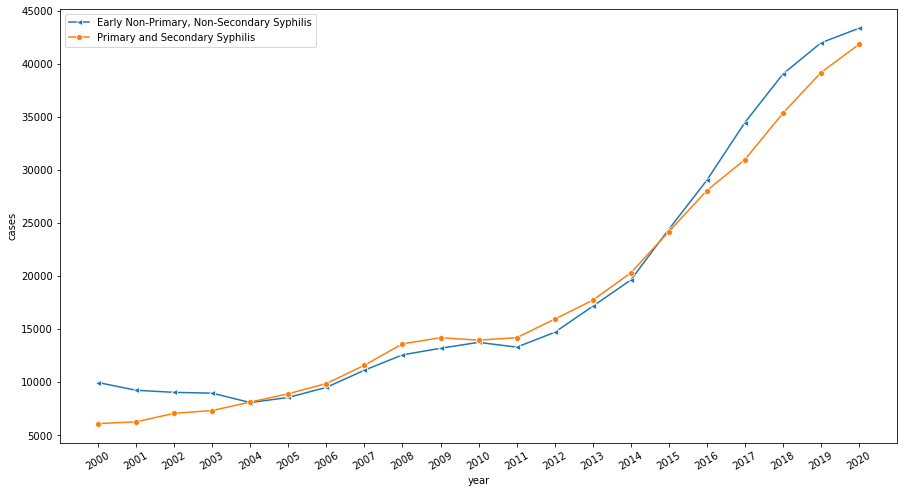

In [80]:
plt.figure(figsize = (15,8))
g = sns.lineplot(data = df_sum, x = 'year', y = 'cases_early_non-primary_non-secondary_syphilis',marker = "<")
sns.lineplot(data = df_sum, x = 'year', y = 'cases_primary_and_secondary_syphilis', marker = "o")
g.set_ylabel('cases')
g.set_xticks(df_sum['year'])
g.set_xticklabels(ax.get_xticklabels(),rotation = 30)
plt.legend(labels=["Early Non-Primary, Non-Secondary Syphilis","Primary and Secondary Syphilis"])
plt.savefig('../Output/EDA/cases_syphilis.png',dpi=300)
plt.show()

### Cases over race

In [145]:
tot_df = []
for j,i in enumerate(np.arange(2016, 2021, 1)):
    tot_df.append(pd.read_csv('../Data/Raw/CDC/CDCSTDcountysexrace'+ 
                              str(i) +'.csv', sep = ',', skiprows = 4))
df = pd.concat(tot_df, axis = 0)

In [146]:
df.head()

,Indicator,Year,Geography,FIPS,Race/Ethnicity,Sex,Cases,Rate per 100000
0,Primary and Secondary Syphilis,2016,"Abbeville County, SC",45001,White,Male,Data not available,Data not available
1,Primary and Secondary Syphilis,2016,"Abbeville County, SC",45001,White,Female,Data not available,Data not available
2,Primary and Secondary Syphilis,2016,"Abbeville County, SC",45001,Unknown,Male,Data not available,Data not available
3,Primary and Secondary Syphilis,2016,"Abbeville County, SC",45001,Unknown,Female,Data not available,Data not available
4,Primary and Secondary Syphilis,2016,"Abbeville County, SC",45001,Native Hawaiian/Other Pacific Islander,Male,Data not available,Data not available


In [147]:
df.loc[df["Year"].str.startswith('2020',na=False), "Year"] = "2020"

In [148]:
data_to_be_removed = ["Cases"]

In [149]:
for col in data_to_be_removed:
    df.loc[df[col].str.contains("Data",na = False), col] = np.nan
    df[col] = df[col].str.replace(',','')
df[['Cases','Year']] = df[['Cases','Year']].apply(pd.to_numeric)

In [150]:
searchfor = ['Gonorrhea', 'Chlamydia']
df_refine = df[df.Indicator.str.contains('|'.join(searchfor))]

In [151]:
df_race = df_refine.groupby(['Year','Race/Ethnicity','Indicator'])['Cases'].sum().reset_index()
df_race.head()

,Year,Race/Ethnicity,Indicator,Cases
0,2016,American Indian/Alaska Native,Chlamydia,0.0
1,2016,American Indian/Alaska Native,Gonorrhea,0.0
2,2016,Asian,Chlamydia,0.0
3,2016,Asian,Gonorrhea,0.0
4,2016,Black/African American,Chlamydia,0.0


In [156]:
df_race = df_race[df_race.Year.isin([2019,2020])]

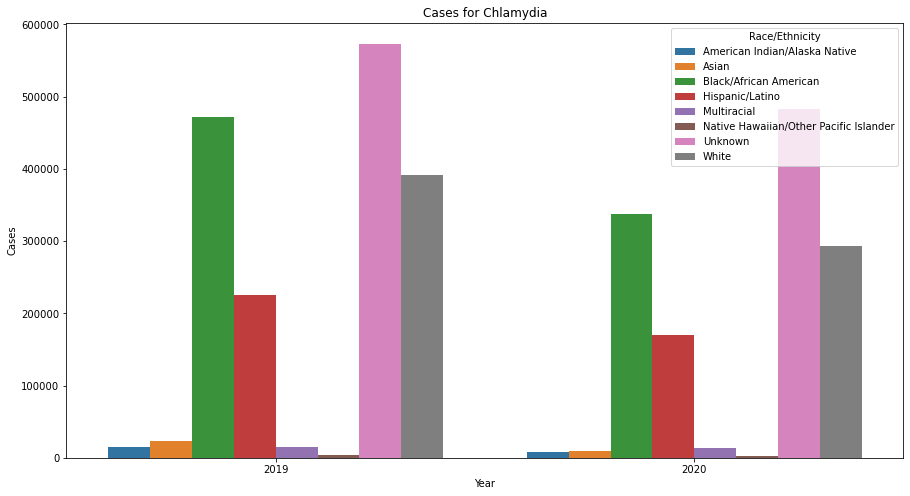

In [161]:
plt.figure(figsize = (15,8))
g = sns.barplot(data = df_race[df_race.Indicator == 'Chlamydia'], x = 'Year', y = 'Cases',hue = 'Race/Ethnicity')
# sns.lineplot(data = df_race[df_race.Indicator == 'Gonorrhea'], x = 'Year', y = 'Cases',marker = ">")
# sns.lineplot(data = df_sum, x = 'year', y = 'cases_Early Non-Primary, Non-Secondary Syphilis',marker = "<")
# sns.lineplot(data = df_sum, x = 'year', y = 'cases_Primary and Secondary Syphilis', marker = "|")
g.set_ylabel('Cases')
# g.set_xticks(pd.unique(df_race['Year']))
# g.set_xticklabels(ax.get_xticklabels(),rotation = 30)
# plt.legend(labels=["Chlamydia","Gonorrhea"])
plt.savefig('../Output/EDA/cases_race_chlamydia.png',dpi=300)
plt.title("Cases for Chlamydia")
plt.show()

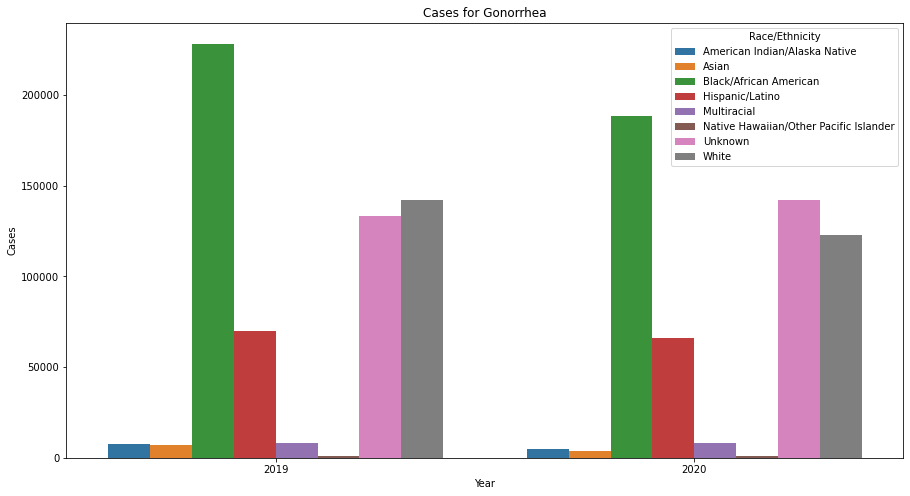

In [162]:
plt.figure(figsize = (15,8))
g = sns.barplot(data = df_race[df_race.Indicator == 'Gonorrhea'], x = 'Year', y = 'Cases',hue = 'Race/Ethnicity')
# sns.lineplot(data = df_race[df_race.Indicator == 'Gonorrhea'], x = 'Year', y = 'Cases',marker = ">")
# sns.lineplot(data = df_sum, x = 'year', y = 'cases_Early Non-Primary, Non-Secondary Syphilis',marker = "<")
# sns.lineplot(data = df_sum, x = 'year', y = 'cases_Primary and Secondary Syphilis', marker = "|")
g.set_ylabel('Cases')
# g.set_xticks(pd.unique(df_race['Year']))
# g.set_xticklabels(ax.get_xticklabels(),rotation = 30)
# plt.legend(labels=["Chlamydia","Gonorrhea"])
plt.savefig('../Output/EDA/cases_race_gonorrhea.png',dpi=300)
plt.title("Cases for Gonorrhea")
plt.show()

### Cases over Sex

In [163]:
tot_df = []
for j,i in enumerate(np.arange(2016, 2021, 1)):
    tot_df.append(pd.read_csv('../Data/Raw/CDC/CDCSTDcountysexrace'+ 
                              str(i) +'.csv', sep = ',', skiprows = 4))
df = pd.concat(tot_df, axis = 0)

In [164]:
df.head()

,Indicator,Year,Geography,FIPS,Race/Ethnicity,Sex,Cases,Rate per 100000
0,Primary and Secondary Syphilis,2016,"Abbeville County, SC",45001,White,Male,Data not available,Data not available
1,Primary and Secondary Syphilis,2016,"Abbeville County, SC",45001,White,Female,Data not available,Data not available
2,Primary and Secondary Syphilis,2016,"Abbeville County, SC",45001,Unknown,Male,Data not available,Data not available
3,Primary and Secondary Syphilis,2016,"Abbeville County, SC",45001,Unknown,Female,Data not available,Data not available
4,Primary and Secondary Syphilis,2016,"Abbeville County, SC",45001,Native Hawaiian/Other Pacific Islander,Male,Data not available,Data not available


In [165]:
df.loc[df["Year"].str.startswith('2020',na=False), "Year"] = "2020"

In [166]:
data_to_be_removed = ["Cases"]

In [167]:
for col in data_to_be_removed:
    df.loc[df[col].str.contains("Data",na = False), col] = np.nan
    df[col] = df[col].str.replace(',','')
df[['Cases','Year']] = df[['Cases','Year']].apply(pd.to_numeric)

In [168]:
searchfor = ['Gonorrhea', 'Chlamydia']
df_refine = df[df.Indicator.str.contains('|'.join(searchfor))]

In [169]:
df_race = df_refine.groupby(['Year','Sex','Indicator'])['Cases'].sum().reset_index()
df_race.head()

,Year,Sex,Indicator,Cases
0,2016,Female,Chlamydia,0.0
1,2016,Female,Gonorrhea,0.0
2,2016,Male,Chlamydia,0.0
3,2016,Male,Gonorrhea,0.0
4,2017,Female,Chlamydia,0.0


In [170]:
df_race = df_race[df_race.Year.isin([2019,2020])]

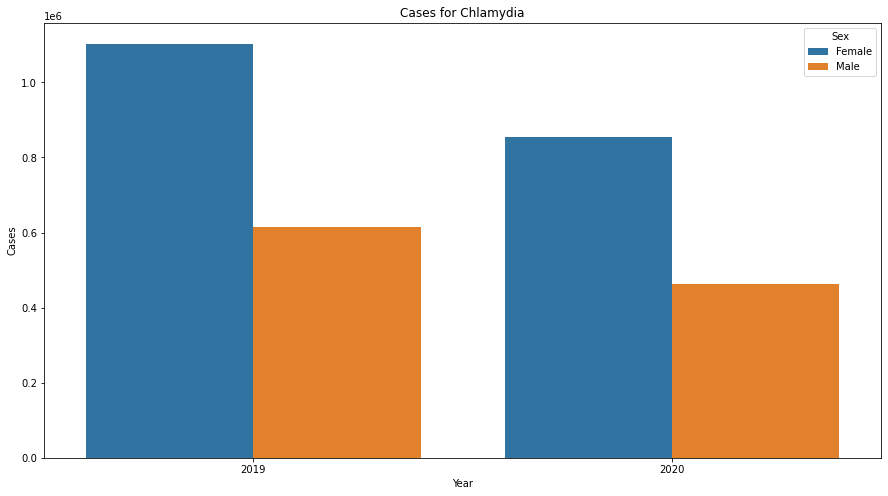

In [171]:
plt.figure(figsize = (15,8))
g = sns.barplot(data = df_race[df_race.Indicator == 'Chlamydia'], x = 'Year', y = 'Cases',hue = 'Sex')
# sns.lineplot(data = df_race[df_race.Indicator == 'Gonorrhea'], x = 'Year', y = 'Cases',marker = ">")
# sns.lineplot(data = df_sum, x = 'year', y = 'cases_Early Non-Primary, Non-Secondary Syphilis',marker = "<")
# sns.lineplot(data = df_sum, x = 'year', y = 'cases_Primary and Secondary Syphilis', marker = "|")
g.set_ylabel('Cases')
# g.set_xticks(pd.unique(df_race['Year']))
# g.set_xticklabels(ax.get_xticklabels(),rotation = 30)
# plt.legend(labels=["Chlamydia","Gonorrhea"])
plt.savefig('../Output/EDA/cases_sex_chlamydia.png',dpi=300)
plt.title("Cases for Chlamydia")
plt.show()

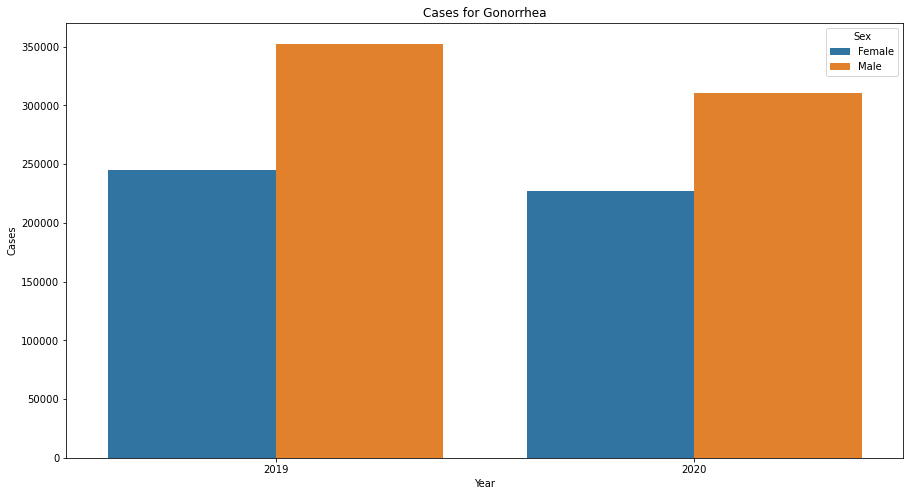

In [172]:
plt.figure(figsize = (15,8))
g = sns.barplot(data = df_race[df_race.Indicator == 'Gonorrhea'], x = 'Year', y = 'Cases',hue = 'Sex')
# sns.lineplot(data = df_race[df_race.Indicator == 'Gonorrhea'], x = 'Year', y = 'Cases',marker = ">")
# sns.lineplot(data = df_sum, x = 'year', y = 'cases_Early Non-Primary, Non-Secondary Syphilis',marker = "<")
# sns.lineplot(data = df_sum, x = 'year', y = 'cases_Primary and Secondary Syphilis', marker = "|")
g.set_ylabel('Cases')
# g.set_xticks(pd.unique(df_race['Year']))
# g.set_xticklabels(ax.get_xticklabels(),rotation = 30)
# plt.legend(labels=["Chlamydia","Gonorrhea"])
plt.savefig('../Output/EDA/cases_sex_gonorrhea.png',dpi=300)
plt.title("Cases for Gonorrhea")
plt.show()

### HIV dataset

In [184]:
df = pd.read_csv("../Data/Raw/CDC/HIV/CDCHIVcountyracesex2017_2020.csv",skiprows=11)
print(data.shape)
df.head()

(67578, 131)


,Indicator,Year,Geography,FIPS,Sex,Cases,Rate per 100000,Percent
0,Receipt of HIV medical care,2020 (COVID-19 Pandemic),"Abbeville County, SC",45001,Male,39,NaN,92.9
1,Receipt of HIV medical care,2020 (COVID-19 Pandemic),"Abbeville County, SC",45001,Female,7,NaN,63.6
2,Receipt of HIV medical care,2019,"Abbeville County, SC",45001,Male,35,NaN,87.5
3,Receipt of HIV medical care,2019,"Abbeville County, SC",45001,Female,10,NaN,83.3
4,Receipt of HIV medical care,2018,"Abbeville County, SC",45001,Male,Data not available,NaN,Data not available


In [185]:
df.loc[df["Year"].str.startswith('2020',na=False), "Year"] = "2020"

In [186]:
data_to_be_removed = ["Cases","Percent","Rate per 100000"]

In [187]:
for col in data_to_be_removed:
    df.loc[df[col].str.contains("Data",na = False), col] = np.nan
    df[col] = df[col].str.replace(',','')
df[['Cases','Year']] = df[['Cases','Year']].apply(pd.to_numeric)

In [188]:
df.head()

,Indicator,Year,Geography,FIPS,Sex,Cases,Rate per 100000,Percent
0,Receipt of HIV medical care,2020,"Abbeville County, SC",45001,Male,39.0,NaN,92.9
1,Receipt of HIV medical care,2020,"Abbeville County, SC",45001,Female,7.0,NaN,63.6
2,Receipt of HIV medical care,2019,"Abbeville County, SC",45001,Male,35.0,NaN,87.5
3,Receipt of HIV medical care,2019,"Abbeville County, SC",45001,Female,10.0,NaN,83.3
4,Receipt of HIV medical care,2018,"Abbeville County, SC",45001,Male,NaN,NaN,NaN


In [191]:
df_hiv = df.groupby(['Year','Indicator'])['Cases'].sum().reset_index()
df_hiv.head()

,Year,Indicator,Cases
0,2017,HIV diagnoses,31452.0
1,2017,HIV prevalence,946544.0
2,2017,HIV viral suppression,293738.0
3,2017,Linkage to HIV care,13620.0
4,2017,PrEP coverage and number of persons prescribed,96755.0


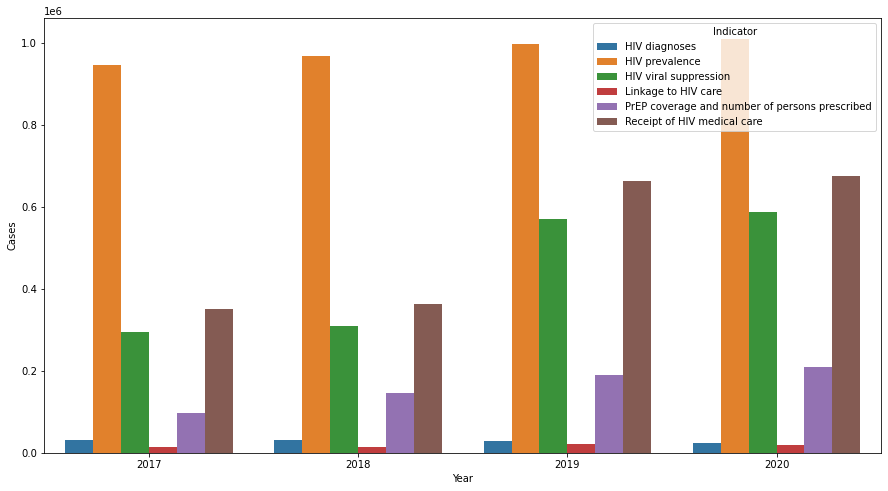

In [194]:
plt.figure(figsize = (15,8))
g = sns.barplot(data = df_hiv, x = 'Year', y = 'Cases',hue = 'Indicator')
# sns.lineplot(data = df_race[df_race.Indicator == 'Gonorrhea'], x = 'Year', y = 'Cases',marker = ">")
# sns.lineplot(data = df_sum, x = 'year', y = 'cases_Early Non-Primary, Non-Secondary Syphilis',marker = "<")
# sns.lineplot(data = df_sum, x = 'year', y = 'cases_Primary and Secondary Syphilis', marker = "|")
g.set_ylabel('Cases')
# g.set_xticks(pd.unique(df_race['Year']))
# g.set_xticklabels(ax.get_xticklabels(),rotation = 30)
# plt.legend(labels=["Chlamydia","Gonorrhea"])
plt.savefig('../Output/EDA/cases_hiv.png',dpi=300)
# plt.title("Cases for Chlamydia")
plt.show()

In [195]:
df_hiv_refine = df_hiv[df_hiv.Indicator == 'HIV diagnoses']

In [196]:
df_hiv_refine

,Year,Indicator,Cases
0,2017,HIV diagnoses,31452.0
6,2018,HIV diagnoses,30776.0
12,2019,HIV diagnoses,29984.0
18,2020,HIV diagnoses,24250.0


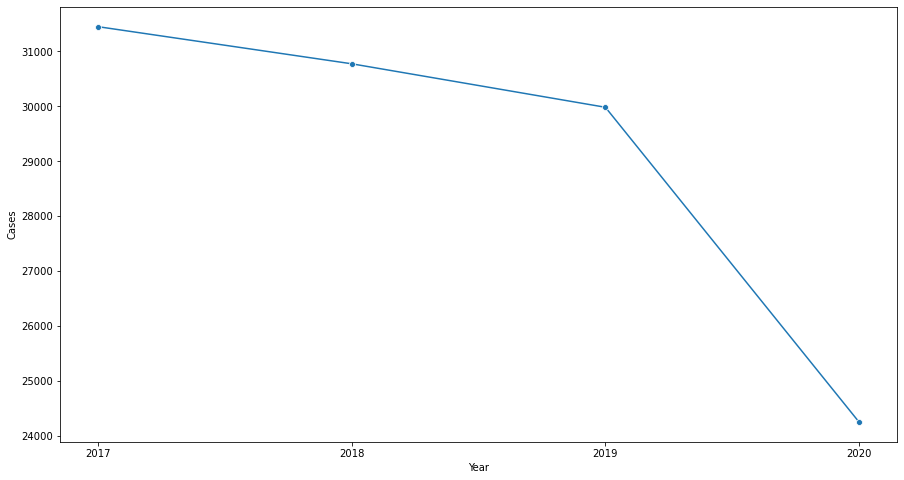

In [198]:
plt.figure(figsize = (15,8))
g = sns.lineplot(data = df_hiv_refine, x = 'Year', y = 'Cases',marker = "o")
# sns.lineplot(data = df_race[df_race.Indicator == 'Gonorrhea'], x = 'Year', y = 'Cases',marker = ">")
# sns.lineplot(data = df_sum, x = 'year', y = 'cases_Early Non-Primary, Non-Secondary Syphilis',marker = "<")
# sns.lineplot(data = df_sum, x = 'year', y = 'cases_Primary and Secondary Syphilis', marker = "|")
g.set_ylabel('Cases')
g.set_xticks(pd.unique(df_hiv['Year']))
# g.set_xticklabels(ax.get_xticklabels(),rotation = 30)
# plt.legend(labels=["Chlamydia","Gonorrhea"])
# plt.savefig('../Output/EDA/cases_hiv.png',dpi=300)
# plt.title("Cases for Chlamydia")
plt.show()

### Counties rate per 1000000 Chlamydia

In [17]:
tot_df = []
for j,i in enumerate(np.arange(2019, 2021, 1)):
    tot_df.append(pd.read_csv('../Data/Raw/CDC/CDCSTDcountysexrace'+ 
                              str(i) +'.csv', sep = ',', skiprows = 4))
df = pd.concat(tot_df, axis = 0)

In [18]:
df.loc[df["Year"].str.startswith('2020',na=False), "Year"] = "2020"

In [19]:
data_to_be_removed = ["Cases","Rate per 100000"]

In [20]:
for col in data_to_be_removed:
    df.loc[df[col].str.contains("Data",na = False), col] = np.nan
    df[col] = df[col].str.replace(',','')
df[['Cases','Year','Rate per 100000']] = df[['Cases','Year','Rate per 100000']].apply(pd.to_numeric)

In [21]:
df.head()

,Indicator,Year,Geography,FIPS,Race/Ethnicity,Sex,Cases,Rate per 100000
0,Primary and Secondary Syphilis,2019,"Abbeville County, SC",45001,White,Male,NaN,NaN
1,Primary and Secondary Syphilis,2019,"Abbeville County, SC",45001,White,Female,NaN,NaN
2,Primary and Secondary Syphilis,2019,"Abbeville County, SC",45001,Unknown,Male,NaN,NaN
3,Primary and Secondary Syphilis,2019,"Abbeville County, SC",45001,Unknown,Female,NaN,NaN
4,Primary and Secondary Syphilis,2019,"Abbeville County, SC",45001,Native Hawaiian/Other Pacific Islander,Male,NaN,NaN


In [22]:
searchfor = ['Chlamydia']
df_refine = df[df.Indicator.str.contains('|'.join(searchfor))]

In [23]:
df_race = df_refine.groupby(['Year','Geography','FIPS'])['Rate per 100000','Cases'].mean().reset_index()
df_race.head()

/var/folders/zl/tww5174129gdj_kds5bh2xx80000gn/T/ipykernel_2937/2546094777.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_race = df_refine.groupby(['Year','Geography','FIPS'])['Rate per 100000','Cases'].mean().reset_index()


,Year,Geography,FIPS,Rate per 100000,Cases
0,2019,"Abbeville County, SC",45001,189.050000,7.812500
1,2019,"Acadia Parish, LA",22001,463.992857,21.562500
2,2019,"Accomack County, VA",51001,373.420000,18.666667
3,2019,"Ada County, ID",16001,NaN,NaN
4,2019,"Adair County, IA",19001,78.300000,2.083333


In [24]:
df = df_race.pivot_table(index=['Geography','FIPS'], columns=['Year']).reset_index()
# df.columns = df.columns.map('_'.join).str.strip('_')
df.head()

Geography   FIPS      Cases          Rate per 100000  \
Year                                    2019     2020            2019   
0     Abbeville County, SC  45001   7.812500   6.1875      189.050000   
1        Acadia Parish, LA  22001  21.562500  30.0000      463.992857   
2      Accomack County, VA  51001  18.666667  13.1250      373.420000   
3         Adair County, IA  19001   2.083333      NaN       78.300000   
4         Adair County, KY  21001   3.125000   3.0000      219.814286   

                  
Year        2020  
0      35.828571  
1     515.530000  
2     225.414286  
3            NaN  
4      12.537500

In [32]:
df['diff_rate'] = df['Rate per 100000'][2020] -df['Rate per 100000'][2019]

In [33]:
df.head()

Geography   FIPS Rate per 100000               diff_rate
Year                                         2019        2020            
0     Abbeville County, SC  45001      189.050000   35.828571 -153.221429
1        Acadia Parish, LA  22001      463.992857  515.530000   51.537143
2      Accomack County, VA  51001      373.420000  225.414286 -148.005714
3         Adair County, IA  19001       78.300000         NaN         NaN
4         Adair County, KY  21001      219.814286   12.537500 -207.276786

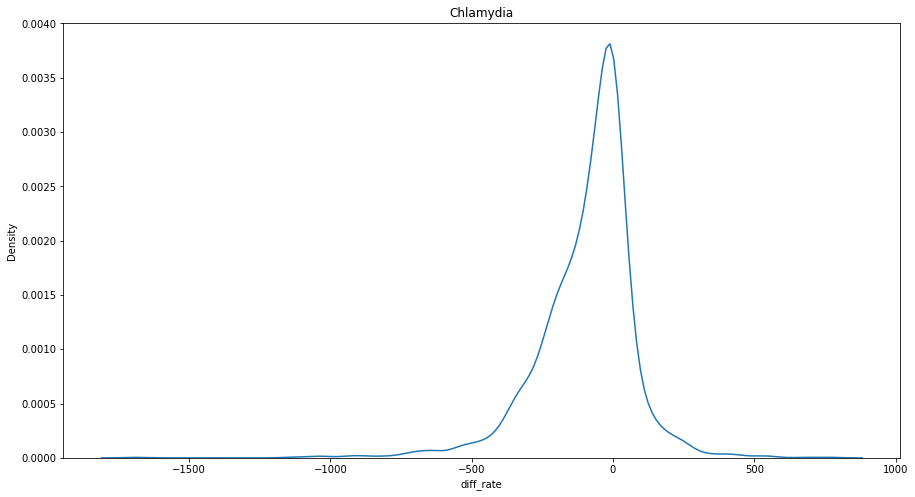

In [109]:
plt.figure(figsize = (15,8))
g = sns.kdeplot(data = df,x = "diff_rate")
plt.title("Chlamydia")
plt.savefig("../Output/EDA/Chlamydia_rate_diff_kernel.png",dpi = 300)
# plt.axhline(y=0,c="black")
plt.show()

In [35]:
df.sort_values("diff_rate")[:10]

Geography   FIPS Rate per 100000                diff_rate
Year                                           2019        2020             
1742    Mcdonough County, IL  17109     2070.350000  372.012500 -1698.337500
2727  Vanderburgh County, IN  18163     1135.392857    0.000000 -1135.392857
257     Brookings County, SD  46011     1224.442857  129.850000 -1094.592857
175        Benton County, OR  41003     1308.271429  261.325000 -1046.946429
269         Brown County, SD  46013     1083.921429   45.533333 -1038.388095
1665      Mahaska County, IA  19123     1066.420000   53.862500 -1012.557500
40       Allegany County, NY  36003      944.935714    0.000000  -944.935714
1166     Hennepin County, MN  27053     1192.235714  271.000000  -921.235714
554         Coles County, IL  17029     1074.964286  157.700000  -917.264286
2698        Union County, KY  21225      882.125000    0.000000  -882.125000

In [36]:
df.sort_values("diff_rate",ascending= False)[:10]

Geography   FIPS Rate per 100000                diff_rate
Year                                             2019         2020            
2515      St. Louis County, MN  27137      272.550000  1042.500000  769.950000
188     Bethel Census Area, AK   2050        0.000000   679.475000  679.475000
705        Delaware County, PA  42045      144.537500   695.220000  550.682500
1839     Monongalia County, WV  54061        0.000000   548.871429  548.871429
1756       Mclennan County, TX  48309      241.987500   775.120000  533.132500
1971   North Slope Borough, AK   2185        0.000000   504.750000  504.750000
1650        Madison County, IL  17119      166.512500   618.100000  451.587500
1993  Oglala Lakota County, SD  46102        0.000000   445.887500  445.887500
464        Chippewa County, WI  55017      146.978571   579.130000  432.151429
1113       Hardeman County, TN  47069        0.000000   424.500000  424.500000

### Counties rate per 1000000 Gonorrhea

In [58]:
tot_df = []
for j,i in enumerate(np.arange(2019, 2021, 1)):
    tot_df.append(pd.read_csv('../Data/Raw/CDC/CDCSTDcountysexrace'+ 
                              str(i) +'.csv', sep = ',', skiprows = 4))
df = pd.concat(tot_df, axis = 0)

In [59]:
df.loc[df["Year"].str.startswith('2020',na=False), "Year"] = "2020"

In [60]:
data_to_be_removed = ["Cases","Rate per 100000"]

In [61]:
for col in data_to_be_removed:
    df.loc[df[col].str.contains("Data",na = False), col] = np.nan
    df[col] = df[col].str.replace(',','')
df[['Cases','Year','Rate per 100000']] = df[['Cases','Year','Rate per 100000']].apply(pd.to_numeric)

In [62]:
df.head()

,Indicator,Year,Geography,FIPS,Race/Ethnicity,Sex,Cases,Rate per 100000
0,Primary and Secondary Syphilis,2019,"Abbeville County, SC",45001,White,Male,NaN,NaN
1,Primary and Secondary Syphilis,2019,"Abbeville County, SC",45001,White,Female,NaN,NaN
2,Primary and Secondary Syphilis,2019,"Abbeville County, SC",45001,Unknown,Male,NaN,NaN
3,Primary and Secondary Syphilis,2019,"Abbeville County, SC",45001,Unknown,Female,NaN,NaN
4,Primary and Secondary Syphilis,2019,"Abbeville County, SC",45001,Native Hawaiian/Other Pacific Islander,Male,NaN,NaN


In [63]:
searchfor = ['Gonorrhea']
df_refine = df[df.Indicator.str.contains('|'.join(searchfor))]

In [64]:
df_race = df_refine.groupby(['Year','FIPS'])['Rate per 100000','Cases'].mean().reset_index()
df_race.head()

/var/folders/zl/tww5174129gdj_kds5bh2xx80000gn/T/ipykernel_2937/139344804.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_race = df_refine.groupby(['Year','FIPS'])['Rate per 100000','Cases'].mean().reset_index()


,Year,FIPS,Rate per 100000,Cases
0,2019,1001,82.392857,7.9375
1,2019,1003,16.285714,14.3750
2,2019,1005,230.435714,8.5000
3,2019,1007,36.364286,3.5625
4,2019,1009,124.871429,5.4375


In [117]:
df = df_race.pivot_table(index=['FIPS'], columns=['Year']).reset_index()
# df.columns = df.columns.map('_'.join).str.strip('_')
df.head()

FIPS Rate per 100000            
Year                  2019        2020
0     1001       82.392857   16.400000
1     1003       16.285714   37.278571
2     1005      230.435714    6.960000
3     1007       36.364286  133.320000
4     1009      124.871429   10.170000

In [118]:
df['diff_rate'] = df['Rate per 100000'][2020] -df['Rate per 100000'][2019]

In [119]:
df.head()

FIPS Rate per 100000               diff_rate
Year                  2019        2020            
0     1001       82.392857   16.400000  -65.992857
1     1003       16.285714   37.278571   20.992857
2     1005      230.435714    6.960000 -223.475714
3     1007       36.364286  133.320000   96.955714
4     1009      124.871429   10.170000 -114.701429

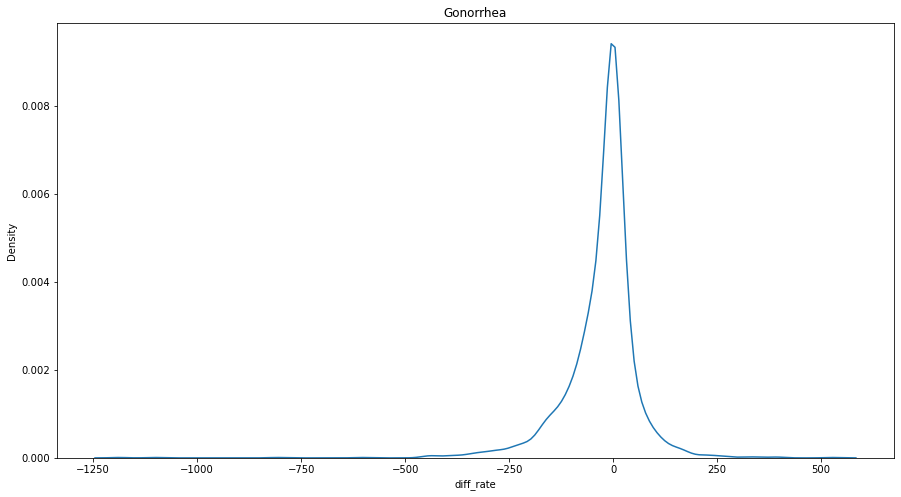

In [120]:
plt.figure(figsize = (15,8))
g = sns.kdeplot(data = df,x = "diff_rate")
plt.title("Gonorrhea")
plt.savefig("../Output/EDA/Gonorrhea_rate_diff_kernel.png",dpi = 300)
# plt.axhline(y=0,c="black")
plt.show()

### Scatterplot of Chlamydia

In [7]:
data_pop = pd.read_csv("../Data/Intermediate/ACSDP05_merge.csv")

In [8]:
data_pop.head()

,Unnamed: 0,pct_sex_age_under_5,pct_sex_age_5_to_9,pct_sex_age_10_to_14,pct_sex_age_15_to_19,pct_sex_age_20_to_24,pct_sex_age_25_to_34,pct_sex_age_35_to_44,pct_sex_age_45_to_54,pct_sex_age_55_to_59,...,pct_one_or_more_race_black,pct_one_or_more_race_native_american,pct_one_or_more_race_asian,pct_one_or_more_race_native_hawaiian_pacific_islander,pct_one_or_more_race_other_race,pct_ethnicity_hispanic,year,total_pop,fips,pct_sex_age_16+
0,0,6.4,7.1,8.0,7.6,5.9,11.9,14.6,15.1,6.0,...,18.8,0.9,1.3,0.0,0.8,2.5,2013,54907,1001,NaN
1,1,6.0,6.6,6.2,6.3,5.4,11.5,12.7,14.4,6.7,...,9.9,1.3,1.1,0.0,1.5,4.4,2013,187114,1003,NaN
2,2,5.8,6.3,5.8,5.8,6.7,13.9,13.4,14.2,7.1,...,47.5,1.4,0.7,0.0,3.7,4.9,2013,27321,1005,NaN
3,3,5.7,6.5,6.0,7.2,7.3,11.7,15.1,15.2,5.3,...,22.5,0.7,0.2,0.0,0.0,1.9,2013,22754,1007,NaN
4,4,6.3,6.4,7.2,6.9,5.7,11.7,13.4,14.0,6.0,...,2.0,1.2,0.3,0.1,1.2,8.3,2013,57623,1009,NaN


In [9]:
data_pop = data_pop[['year','fips','total_pop']]

In [11]:
data_pop = data_pop.loc[data_pop.year.isin([2019,2020]),]

In [12]:
data_pop

,year,fips,total_pop
19321,2019,1001,55380
19322,2019,1003,212830
19323,2019,1005,25361
19324,2019,1007,22493
19325,2019,1009,57681
...,...,...,...
25757,2020,72145,51089
25758,2020,72147,8508
25759,2020,72149,21899
25760,2020,72151,32867


In [29]:
df_race.columns = df_race.columns.str.lower()
df_race

,year,geography,fips,rate per 100000,cases
0,2019,"Abbeville County, SC",45001,189.050000,7.812500
1,2019,"Acadia Parish, LA",22001,463.992857,21.562500
2,2019,"Accomack County, VA",51001,373.420000,18.666667
3,2019,"Ada County, ID",16001,NaN,NaN
4,2019,"Adair County, IA",19001,78.300000,2.083333
...,...,...,...,...,...
6445,2020,"Yuma County, AZ",4027,285.057143,61.375000
6446,2020,"Yuma County, CO",8125,42.150000,0.875000
6447,2020,"Zapata County, TX",48505,34.223077,2.875000
6448,2020,"Zavala County, TX",48507,20.778571,2.625000


In [31]:
df = pd.merge(df_race,data_pop,on = ['year','fips'])

In [34]:
df['adj_cases'] = df['cases']/df['total_pop']

In [35]:
df

,year,geography,fips,rate per 100000,cases,total_pop,adj_cases
0,2019,"Abbeville County, SC",45001,189.050000,7.812500,24627,0.000317
1,2019,"Acadia Parish, LA",22001,463.992857,21.562500,62457,0.000345
2,2019,"Accomack County, VA",51001,373.420000,18.666667,32673,0.000571
3,2019,"Ada County, ID",16001,NaN,NaN,456849,NaN
4,2019,"Adair County, IA",19001,78.300000,2.083333,7085,0.000294
...,...,...,...,...,...,...,...
6436,2020,"Yuma County, AZ",4027,285.057143,61.375000,211931,0.000290
6437,2020,"Yuma County, CO",8125,42.150000,0.875000,10013,0.000087
6438,2020,"Zapata County, TX",48505,34.223077,2.875000,14243,0.000202
6439,2020,"Zavala County, TX",48507,20.778571,2.625000,11930,0.000220


In [36]:
df_ref = df.pivot_table(index=['fips'], columns=['year']).reset_index()
df_ref

fips adj_cases              cases            rate per 100000            \
year             2019      2020     2019       2020            2019      2020   
0      1001  0.000365  0.000464  20.1875  25.833333      157.507143  263.0700   
1      1003  0.000220       NaN  46.7500        NaN       59.585714       NaN   
2      1005  0.000545  0.000503  13.8125  12.583333      769.692857  154.3500   
3      1007  0.000336  0.000447   7.5625  10.000000      134.221429  106.8500   
4      1009  0.000000  0.000246   0.0000  14.200000        0.000000   84.0625   
...     ...       ...       ...      ...        ...             ...       ...   
3215  72145       NaN       NaN      NaN        NaN             NaN       NaN   
3216  72147       NaN       NaN      NaN        NaN             NaN       NaN   
3217  72149       NaN       NaN      NaN        NaN             NaN       NaN   
3218  72151       NaN       NaN      NaN        NaN             NaN       NaN   
3219  72153       NaN       NaN      NaN        NaN             NaN       NaN   

     total_pop            
year      2019      2020  
0      55380.0   55639.0  
1     212830.0  218289.0  
2      25361.0   25026.0  
3      22493.0   22374.0  
4      57681.0   57755.0  
...        ...       ...  
3215   52192.0   51089.0  
3216    8642.0    8508.0  
3217   22403.0   21899.0  
3218   33499.0   32867.0  
3219   35428.0   34501.0  

[3220 rows x 9 columns]

In [38]:
df_ref['adj_cases'][2019]

0       0.000365
1       0.000220
2       0.000545
3       0.000336
4       0.000000
          ...   
3215         NaN
3216         NaN
3217         NaN
3218         NaN
3219         NaN
Name: 2019, Length: 3220, dtype: float64

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

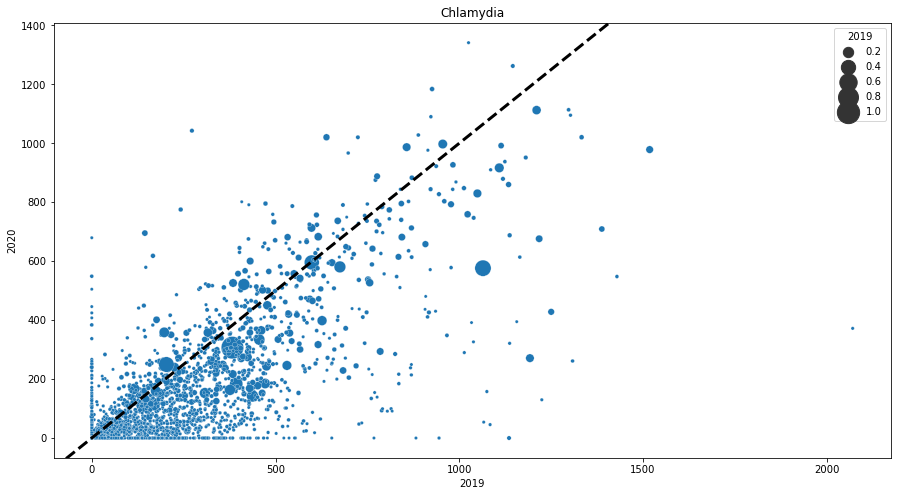

In [51]:
plt.figure(figsize = (15,8))
g = sns.scatterplot(x = df_ref['rate per 100000'][2019],y = df_ref['rate per 100000'][2020],size = df_ref.total_pop[2019],sizes=(10, 500))
xpoints = ypoints = plt.xlim()
plt.plot(xpoints, ypoints, linestyle='--', color='k', lw=3, scalex=False, scaley=False)
# sns.lineplot(x = [1,2],y =[1,2])
plt.title("Chlamydia")
# plt.savefig("../Output/EDA/Gonorrhea_rate_diff_kernel.png",dpi = 300)
# plt.axhline(y=0,c="black")
plt.show()

### Scatterplot of Gonorrhea

In [52]:
data_pop = pd.read_csv("../Data/Intermediate/ACSDP05_merge.csv")

In [53]:
data_pop.head()

,Unnamed: 0,pct_sex_age_under_5,pct_sex_age_5_to_9,pct_sex_age_10_to_14,pct_sex_age_15_to_19,pct_sex_age_20_to_24,pct_sex_age_25_to_34,pct_sex_age_35_to_44,pct_sex_age_45_to_54,pct_sex_age_55_to_59,...,pct_one_or_more_race_black,pct_one_or_more_race_native_american,pct_one_or_more_race_asian,pct_one_or_more_race_native_hawaiian_pacific_islander,pct_one_or_more_race_other_race,pct_ethnicity_hispanic,year,total_pop,fips,pct_sex_age_16+
0,0,6.4,7.1,8.0,7.6,5.9,11.9,14.6,15.1,6.0,...,18.8,0.9,1.3,0.0,0.8,2.5,2013,54907,1001,NaN
1,1,6.0,6.6,6.2,6.3,5.4,11.5,12.7,14.4,6.7,...,9.9,1.3,1.1,0.0,1.5,4.4,2013,187114,1003,NaN
2,2,5.8,6.3,5.8,5.8,6.7,13.9,13.4,14.2,7.1,...,47.5,1.4,0.7,0.0,3.7,4.9,2013,27321,1005,NaN
3,3,5.7,6.5,6.0,7.2,7.3,11.7,15.1,15.2,5.3,...,22.5,0.7,0.2,0.0,0.0,1.9,2013,22754,1007,NaN
4,4,6.3,6.4,7.2,6.9,5.7,11.7,13.4,14.0,6.0,...,2.0,1.2,0.3,0.1,1.2,8.3,2013,57623,1009,NaN


In [54]:
data_pop = data_pop[['year','fips','total_pop']]

In [55]:
data_pop = data_pop.loc[data_pop.year.isin([2019,2020]),]

In [56]:
data_pop

,year,fips,total_pop
19321,2019,1001,55380
19322,2019,1003,212830
19323,2019,1005,25361
19324,2019,1007,22493
19325,2019,1009,57681
...,...,...,...
25757,2020,72145,51089
25758,2020,72147,8508
25759,2020,72149,21899
25760,2020,72151,32867


In [65]:
df_race.columns = df_race.columns.str.lower()
df_race

,year,fips,rate per 100000,cases
0,2019,1001,82.392857,7.9375
1,2019,1003,16.285714,14.3750
2,2019,1005,230.435714,8.5000
3,2019,1007,36.364286,3.5625
4,2019,1009,124.871429,5.4375
...,...,...,...,...
6441,2020,72145,NaN,NaN
6442,2020,72147,NaN,NaN
6443,2020,72149,NaN,NaN
6444,2020,72151,NaN,NaN


In [66]:
df = pd.merge(df_race,data_pop,on = ['year','fips'])

In [67]:
df['adj_cases'] = df['cases']/df['total_pop']

In [68]:
df

,year,fips,rate per 100000,cases,total_pop,adj_cases
0,2019,1001,82.392857,7.9375,55380,0.000143
1,2019,1003,16.285714,14.3750,212830,0.000068
2,2019,1005,230.435714,8.5000,25361,0.000335
3,2019,1007,36.364286,3.5625,22493,0.000158
4,2019,1009,124.871429,5.4375,57681,0.000094
...,...,...,...,...,...,...
6432,2020,72145,NaN,NaN,51089,NaN
6433,2020,72147,NaN,NaN,8508,NaN
6434,2020,72149,NaN,NaN,21899,NaN
6435,2020,72151,NaN,NaN,32867,NaN


In [69]:
df_ref = df.pivot_table(index=['fips'], columns=['year']).reset_index()
df_ref

fips adj_cases              cases            rate per 100000  \
year             2019      2020     2019       2020            2019   
0      1001  0.000143  0.000115   7.9375   6.400000       82.392857   
1      1003  0.000068  0.000076  14.3750  16.562500       16.285714   
2      1005  0.000335  0.000016   8.5000   0.400000      230.435714   
3      1007  0.000158  0.000298   3.5625   6.666667       36.364286   
4      1009  0.000094  0.000005   5.4375   0.300000      124.871429   
...     ...       ...       ...      ...        ...             ...   
3215  72145       NaN       NaN      NaN        NaN             NaN   
3216  72147       NaN       NaN      NaN        NaN             NaN   
3217  72149       NaN       NaN      NaN        NaN             NaN   
3218  72151       NaN       NaN      NaN        NaN             NaN   
3219  72153       NaN       NaN      NaN        NaN             NaN   

                 total_pop            
year        2020      2019      2020  
0      16.400000   55380.0   55639.0  
1      37.278571  212830.0  218289.0  
2       6.960000   25361.0   25026.0  
3     133.320000   22493.0   22374.0  
4      10.170000   57681.0   57755.0  
...          ...       ...       ...  
3215         NaN   52192.0   51089.0  
3216         NaN    8642.0    8508.0  
3217         NaN   22403.0   21899.0  
3218         NaN   33499.0   32867.0  
3219         NaN   35428.0   34501.0  

[3220 rows x 9 columns]

In [70]:
df_ref['adj_cases'][2019]

0       0.000143
1       0.000068
2       0.000335
3       0.000158
4       0.000094
          ...   
3215         NaN
3216         NaN
3217         NaN
3218         NaN
3219         NaN
Name: 2019, Length: 3220, dtype: float64

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns

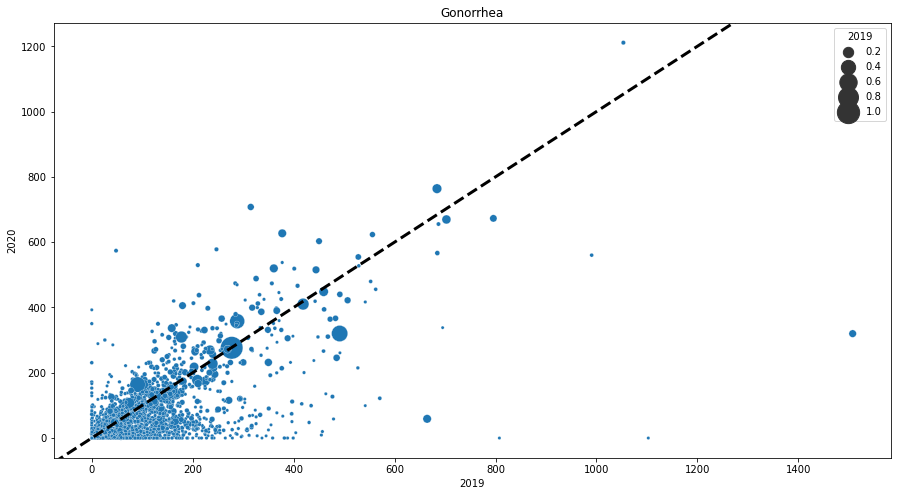

In [73]:
plt.figure(figsize = (15,8))
g = sns.scatterplot(x = df_ref['rate per 100000'][2019],y = df_ref['rate per 100000'][2020],size = df_ref.total_pop[2019],sizes=(10, 500))
xpoints = ypoints = plt.xlim()
plt.plot(xpoints, ypoints, linestyle='--', color='k', lw=3, scalex=False, scaley=False)
# sns.lineplot(x = [1,2],y =[1,2])
plt.title("Gonorrhea")
# plt.savefig("../Output/EDA/Gonorrhea_rate_diff_kernel.png",dpi = 300)
# plt.axhline(y=0,c="black")
plt.show()